In [187]:
import pandas as pd
import numpy as np
from scipy import nan
import seaborn as sns #plotting
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sms
import scipy.stats as sps
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [188]:
df = pd.read_csv('/content/coursework_1_data_2019.csv')

In [189]:
df.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,2013_pop_male,2018_pop_male,2008_cases_female,2013_cases_female,2018_cases_female,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,83890,81915,77983,406,429,533,88794,97115,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough
1,Barnet,539,594,773,340435,344062,355955,212,204,292,169060,161533,161769,327,390,481,171375,182529,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,110384,117286,127055,212,265,315,116371,126724,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,87026,84077,90890,299,292,338,91599,88898,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority
4,Bedford,311,327,367,158185,164807,170463,138,145,156,75929,85074,82609,173,182,211,82256,79733,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority


##EDA

In [190]:
df.isnull().sum()

local_authority_area    0
2008_cases_total        0
2013_cases_total        0
2018_cases_total        0
2008_pop_total          0
2013_pop_total          0
2018_pop_total          0
2008_cases_male         0
2013_cases_male         0
2018_cases_male         0
2008_pop_male           0
2013_pop_male           0
2018_pop_male           0
2008_cases_female       0
2013_cases_female       0
2018_cases_female       0
2008_pop_female         0
2013_pop_female         0
2018_pop_female         0
total_budget            0
clean_air               0
clean_environ           0
health_training         0
school_awareness        0
media_awareness         0
sub_counselling         0
region                  0
local_authority_type    0
dtype: int64

In [191]:
df.describe()

,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,2013_pop_male,2018_pop_male,2008_cases_female,2013_cases_female,2018_cases_female,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
count,152.000000,152.000000,152.000000,1.520000e+02,1.520000e+02,1.520000e+02,152.000000,152.000000,152.000000,152.00000,152.000000,152.000000,152.00000,152.000000,152.000000,152.000000,152.000000,152.000000,1.520000e+02,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,1075.296053,1159.513158,1278.605263,3.409223e+05,3.542821e+05,3.682895e+05,375.796053,401.526316,438.276316,166914.75000,171990.611842,177176.980263,699.50000,757.986842,840.328947,174007.565789,182291.480263,191112.500000,2.703092e+05,59368.421053,68427.631579,25111.842105,62631.578947,32967.105263,21802.631579
std,922.378705,997.231047,1069.691997,2.621354e+05,2.788745e+05,2.945969e+05,323.560804,353.756510,376.478018,128635.27204,136886.259551,145624.858528,605.75565,654.418340,703.887519,133527.499451,142585.690264,149675.481541,2.104618e+05,53980.948836,62114.997173,22815.281663,55056.104342,29930.253972,19832.423607
min,5.000000,1.000000,4.000000,2.200000e+03,2.385000e+03,2.440000e+03,2.000000,0.000000,1.000000,1085.00000,1305.000000,1426.000000,3.00000,1.000000,3.000000,1115.000000,1080.000000,1014.000000,2.000000e+03,0.000000,0.000000,0.000000,2000.000000,0.000000,0.000000
25%,493.500000,531.750000,592.500000,1.894748e+05,1.880672e+05,1.934285e+05,175.750000,183.250000,198.250000,93000.25000,90270.500000,91086.500000,305.00000,329.500000,372.750000,95983.750000,99307.250000,101902.750000,1.400000e+05,26000.000000,32000.000000,11750.000000,31750.000000,14000.000000,9000.000000
50%,729.000000,794.500000,873.500000,2.540925e+05,2.577715e+05,2.642035e+05,266.000000,271.000000,293.500000,122694.00000,121755.000000,121868.000000,460.50000,532.000000,570.500000,128675.500000,135104.000000,140668.500000,2.000000e+05,41500.000000,48000.000000,18000.000000,45000.000000,25000.000000,16000.000000
75%,1386.000000,1470.250000,1641.500000,3.751225e+05,4.024990e+05,4.094285e+05,473.750000,519.250000,554.750000,183610.00000,189826.000000,194432.750000,886.50000,957.000000,1043.000000,191395.500000,197497.750000,213147.750000,3.017500e+05,70000.000000,79000.000000,26500.000000,69750.000000,39750.000000,27250.000000
max,5065.000000,5582.000000,5745.000000,1.411380e+06,1.528154e+06,1.623387e+06,1762.000000,2065.000000,2000.000000,694681.00000,754646.000000,790860.000000,3303.00000,3517.000000,3745.000000,716699.000000,773508.000000,832527.000000,1.170000e+06,297000.000000,333000.000000,130000.000000,340000.000000,203000.000000,99000.000000


####Calculate the growth rate of total cases in 5 years


In [192]:
df_growth = df[['local_authority_area']]

In [193]:
#Calculate the growth rate of total cases in 5 years
df_growth['total_case_growth_rate_2008_2013'] = (((df['2013_cases_total'] - df['2008_cases_total'])/df['2008_cases_total']))
df_growth['total_case_growth_rate_2013_2018'] = (((df['2018_cases_total'] - df['2013_cases_total'])/df['2013_cases_total']))
df_growth

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,local_authority_area,total_case_growth_rate_2008_2013,total_case_growth_rate_2013_2018
0,Barking and Dagenham,0.043845,0.232633
1,Barnet,0.102041,0.301347
2,Barnsley,0.252778,0.168514
3,Bath and North East Somerset,-0.076754,0.173397
4,Bedford,0.051447,0.122324
...,...,...,...
147,Wirral,0.035937,0.126320
148,Wokingham,0.226891,0.157534
149,Wolverhampton,0.089459,0.099936
150,Worcestershire,0.126196,0.057498


In [194]:
df_growth.sort_values(by=['total_case_growth_rate_2013_2018'],ascending=False)

,local_authority_area,total_case_growth_rate_2008_2013,total_case_growth_rate_2013_2018
59,Isles of Scilly,-0.800000,3.000000
64,Kingston upon Thames,0.007435,0.453875
102,Richmond upon Thames,0.188940,0.383721
61,Kensington and Chelsea,-0.036913,0.344948
72,Lewisham,0.081712,0.334532
...,...,...,...
27,Coventry,0.153994,-0.036545
91,Nottingham,0.061010,-0.065588
48,Hammersmith and Fulham,0.027027,-0.073308
25,City of London,-0.125000,-0.142857


In [195]:
#查看2008到2013的总病例各地区增长率
df_growth.sort_values(by=['total_case_growth_rate_2008_2013'],ascending=False)

,local_authority_area,total_case_growth_rate_2008_2013,total_case_growth_rate_2013_2018
127,Sutton,0.335570,0.105528
45,Greenwich,0.310976,0.178295
2,Barnsley,0.252778,0.168514
148,Wokingham,0.226891,0.157534
16,Bromley,0.206219,0.268657
...,...,...,...
3,Bath and North East Somerset,-0.076754,0.173397
138,Wandsworth,-0.088292,0.132632
133,Tower Hamlets,-0.112478,0.198020
25,City of London,-0.125000,-0.142857


####Calculate the incidence of disease in the population in 5 years


In [196]:
df_pop = df[['local_authority_area']]

In [197]:
df.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,2013_pop_male,2018_pop_male,2008_cases_female,2013_cases_female,2018_cases_female,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,83890,81915,77983,406,429,533,88794,97115,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough
1,Barnet,539,594,773,340435,344062,355955,212,204,292,169060,161533,161769,327,390,481,171375,182529,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,110384,117286,127055,212,265,315,116371,126724,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,87026,84077,90890,299,292,338,91599,88898,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority
4,Bedford,311,327,367,158185,164807,170463,138,145,156,75929,85074,82609,173,182,211,82256,79733,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority


In [198]:
#计算各个年份人口病发率
df_pop['case_pop_rate_2008'] = ((df['2008_cases_total']/df['2008_pop_total']))
df_pop['case_pop_rate_2013'] = ((df['2013_cases_total']/df['2013_pop_total']))
df_pop['case_pop_rate_2018'] = ((df['2018_cases_total']/df['2018_pop_total']))
df_pop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,local_authority_area,case_pop_rate_2008,case_pop_rate_2013,case_pop_rate_2018
0,Barking and Dagenham,0.003434,0.003458,0.004197
1,Barnet,0.001583,0.001726,0.002172
2,Barnsley,0.001588,0.001848,0.002044
3,Bath and North East Somerset,0.002553,0.002434,0.002609
4,Bedford,0.001966,0.001984,0.002153
...,...,...,...,...
147,Wirral,0.008241,0.008496,0.008729
148,Wokingham,0.000740,0.000881,0.001014
149,Wolverhampton,0.006015,0.006231,0.006545
150,Worcestershire,0.004861,0.005051,0.005083


In [199]:
#计算人口病发率增长率
df_pop['total_case_pop_rate_2008_2013'] = (((df_pop['case_pop_rate_2013'] - df_pop['case_pop_rate_2008'])/df_pop['case_pop_rate_2008']))
df_pop['total_case_pop_rate_2013_2018'] = (((df_pop['case_pop_rate_2018'] - df_pop['case_pop_rate_2013'])/df_pop['case_pop_rate_2013']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [200]:
#查看2008到2013的各地区人口病发率增长率
df_pop.sort_values(by=['total_case_pop_rate_2008_2013'],ascending=False)

,local_authority_area,case_pop_rate_2008,case_pop_rate_2013,case_pop_rate_2018,total_case_pop_rate_2008_2013,total_case_pop_rate_2013_2018
102,Richmond upon Thames,0.001151,0.001472,0.001914,0.278623,0.300451
127,Sutton,0.001562,0.001947,0.002170,0.246924,0.114048
82,Newham,0.002327,0.002775,0.002992,0.192350,0.078453
148,Wokingham,0.000740,0.000881,0.001014,0.190021,0.151270
56,Hillingdon,0.002316,0.002724,0.002772,0.176013,0.017521
...,...,...,...,...,...,...
116,Southampton,0.005702,0.005493,0.005733,-0.036596,0.043749
20,Cambridgeshire,0.002568,0.002466,0.002574,-0.039538,0.043481
95,Peterborough,0.002433,0.002328,0.002585,-0.043333,0.110453
3,Bath and North East Somerset,0.002553,0.002434,0.002609,-0.046598,0.072012


In [201]:
#查看2013到2018的各地区人口病发率增长率
df_pop.sort_values(by=['total_case_pop_rate_2013_2018'],ascending=False)

,local_authority_area,case_pop_rate_2008,case_pop_rate_2013,case_pop_rate_2018,total_case_pop_rate_2008_2013,total_case_pop_rate_2013_2018
59,Isles of Scilly,0.002273,0.000419,0.001639,-0.815514,2.909836
64,Kingston upon Thames,0.001623,0.001660,0.002393,0.022858,0.441652
61,Kensington and Chelsea,0.001730,0.001867,0.002546,0.079396,0.363783
78,Merton,0.001626,0.001742,0.002305,0.071228,0.323513
102,Richmond upon Thames,0.001151,0.001472,0.001914,0.278623,0.300451
...,...,...,...,...,...,...
145,Wiltshire,0.003001,0.002987,0.002902,-0.004633,-0.028222
130,Telford and Wrekin,0.004717,0.004967,0.004826,0.053073,-0.028375
96,Plymouth,0.002743,0.002970,0.002879,0.082562,-0.030686
112,Solihull,0.002922,0.003256,0.003015,0.114478,-0.073963


####Calculate the growth rate of total cases in each region in 10 years

In [202]:
df_growth_10 = df[['local_authority_area']]

In [203]:
#计算总病例增长率
df_growth_10['total_case_growth_rate_2008_2018'] = (((df['2018_cases_total'] - df['2008_cases_total'])/df['2008_cases_total']))
df_growth_10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,local_authority_area,total_case_growth_rate_2008_2018
0,Barking and Dagenham,0.286678
1,Barnet,0.434137
2,Barnsley,0.463889
3,Bath and North East Somerset,0.083333
4,Bedford,0.180064
...,...,...
147,Wirral,0.166797
148,Wokingham,0.420168
149,Wolverhampton,0.198336
150,Worcestershire,0.190949


In [204]:
#增长率
px.box(df_growth_10, y="total_case_growth_rate_2008_2018")

####Calculate the incidence rate of population cases in 10 years

In [205]:
df_pop_10 = df[['local_authority_area']]

In [206]:
#计算人口病发率增长率
df_pop_10['total_case_pop_rate_2008_2018'] = (((df_pop['case_pop_rate_2018'] - df_pop['case_pop_rate_2008'])/df_pop['case_pop_rate_2008']))
df_pop_10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,local_authority_area,total_case_pop_rate_2008_2018
0,Barking and Dagenham,0.222301
1,Barnet,0.371607
2,Barnsley,0.287189
3,Bath and North East Somerset,0.022058
4,Bedford,0.095067
...,...,...
147,Wirral,0.059153
148,Wokingham,0.370037
149,Wolverhampton,0.088082
150,Worcestershire,0.045647


In [207]:
#病发率
px.box(df_pop_10, y="total_case_pop_rate_2008_2018")

In [208]:
df_pop_10[df_pop_10["total_case_pop_rate_2008_2018"] > np.percentile(df_pop_10["total_case_pop_rate_2008_2018"], q = 95)]

,local_authority_area,total_case_pop_rate_2008_2018
1,Barnet,0.371607
16,Bromley,0.408987
61,Kensington and Chelsea,0.472062
64,Kingston upon Thames,0.474604
78,Merton,0.417784
102,Richmond upon Thames,0.662787
127,Sutton,0.389133
148,Wokingham,0.370037


In [209]:
df_pop_10[df_pop_10["total_case_pop_rate_2008_2018"] < np.percentile(df_pop_10["total_case_pop_rate_2008_2018"], q = 1)]

,local_authority_area,total_case_pop_rate_2008_2018
59,Isles of Scilly,-0.278689
105,Rutland,-0.127139


In [210]:
df_pop_10.sort_values(by = 'total_case_pop_rate_2008_2018', ascending= False)

,local_authority_area,total_case_pop_rate_2008_2018
102,Richmond upon Thames,0.662787
64,Kingston upon Thames,0.474604
61,Kensington and Chelsea,0.472062
78,Merton,0.417784
16,Bromley,0.408987
...,...,...
132,Torbay,-0.021138
145,Wiltshire,-0.032724
80,Milton Keynes,-0.038417
105,Rutland,-0.127139


####Analyze the relationship between the Budget and the growth of cases

In [211]:
df = df[df['local_authority_area'] != 'Isles of Scilly']
df = df[df['local_authority_area'] != 'City of London']

In [212]:
#Calualate By groupby for later use
group_budget = df.groupby(['region'])['total_budget'].mean()

In [213]:
#Calualate By groupby for later use
group_type = df.groupby(['local_authority_type'])['total_budget'].mean()

In [214]:
group_type

local_authority_type
london_borough             192406.250000
metropolitan_borough       245277.777778
non_metropolitan_county    614185.185185
unitary_authority          172090.909091
Name: total_budget, dtype: float64

In [215]:
df_region = df[['local_authority_area','region','local_authority_type']]

In [216]:
df_budget = pd.merge(df_growth_10,df_region, on = ['local_authority_area'],how='left')

In [217]:
#Calualate By groupby for later use
group_grow_type = df_budget.groupby(['local_authority_type'])['total_case_growth_rate_2008_2018'].mean()

In [218]:
group_grow_type

local_authority_type
london_borough             0.295775
metropolitan_borough       0.218318
non_metropolitan_county    0.198186
unitary_authority          0.165326
Name: total_case_growth_rate_2008_2018, dtype: float64

In [219]:
df[df['local_authority_type'] == 'other_london']

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,2013_pop_male,2018_pop_male,2008_cases_female,2013_cases_female,2018_cases_female,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type


In [220]:
#Calualate By groupby for later use
group_grow_region = df_budget.groupby(['region'])['total_case_growth_rate_2008_2018'].mean()

In [221]:
group_grow_region

region
East Midlands               0.117223
East of England             0.176726
London                      0.295775
North East                  0.240509
North West                  0.209922
South East                  0.176870
South West                  0.165827
West Midlands               0.177704
Yorkshire and the Humber    0.216952
Name: total_case_growth_rate_2008_2018, dtype: float64

In [222]:
group1 = pd.merge(group_grow_region,group_budget, on = ['region'],how='left')

In [223]:
group1

,total_case_growth_rate_2008_2018,total_budget
region,,
East Midlands,0.117223,372333.333333
East of England,0.176726,409818.181818
London,0.295775,192406.250000
North East,0.240509,174166.666667
North West,0.209922,229478.260870
South East,0.176870,375263.157895
South West,0.165827,279333.333333
West Midlands,0.177704,304571.428571
Yorkshire and the Humber,0.216952,271133.333333


In [224]:
group2 = pd.merge(group_grow_type,group_type, on = ['local_authority_type'],how='left')
group2

,total_case_growth_rate_2008_2018,total_budget
local_authority_type,,
london_borough,0.295775,192406.250000
metropolitan_borough,0.218318,245277.777778
non_metropolitan_county,0.198186,614185.185185
unitary_authority,0.165326,172090.909091


In [225]:
fig = px.scatter(group1, x="total_budget", y="total_case_growth_rate_2008_2018", trendline="ols")
fig.show()

In [226]:
fig = px.scatter(group2, x="total_budget", y="total_case_growth_rate_2008_2018", trendline="ols")
fig.show()

##Budget Visualization

In [227]:
df[df["local_authority_area"]== 'Croydon']

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,2013_pop_male,2018_pop_male,2008_cases_female,2013_cases_female,2018_cases_female,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
28,Croydon,685,782,1005,343556,354141,374614,223,238,317,169201,167813,167602,462,544,688,174355,186328,207012,230000,47000,27000,28000,78000,21000,29000,London,london_borough


In [228]:
df[df["local_authority_area"]== 'Croydon']['clean_air']

28    47000
Name: clean_air, dtype: int64

In [229]:
cols = ['clean_air','clean_environ','health_training','school_awareness','media_awareness','sub_counselling']

In [230]:
d = {'total_budget': cols, 'amount': nan}
df_Cro_budget = pd.DataFrame(data = d)

In [231]:
df_Cro_budget

,total_budget,amount
0,clean_air,NaN
1,clean_environ,NaN
2,health_training,NaN
3,school_awareness,NaN
4,media_awareness,NaN
5,sub_counselling,NaN


In [232]:
for x in range (len(df_Cro_budget)):
  df_Cro_budget['amount'][x] = df[df["local_authority_area"]== 'Croydon'][df_Cro_budget['total_budget'][x]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [233]:
df_Cro_budget

,total_budget,amount
0,clean_air,47000.0
1,clean_environ,27000.0
2,health_training,28000.0
3,school_awareness,78000.0
4,media_awareness,21000.0
5,sub_counselling,29000.0


In [234]:
fig = px.pie(df_Cro_budget,
             values="amount",
             names="total_budget",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

##Correlation test

In [235]:
summary = df.copy()

In [236]:
#10年内增长率
summary_growth = pd.merge(df, df_growth_10, on=['local_authority_area'], how='left')

In [237]:
#10年内人口发病率
summary_pop = pd.merge(df, df_pop_10, on=['local_authority_area'], how='left')

In [238]:
summary_growth = summary_growth[['local_authority_area','total_case_growth_rate_2008_2018']]
summary_pop = summary_pop[['local_authority_area','total_case_pop_rate_2008_2018']]

In [239]:
summary

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,2013_pop_male,2018_pop_male,2008_cases_female,2013_cases_female,2018_cases_female,2008_pop_female,2013_pop_female,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,83890,81915,77983,406,429,533,88794,97115,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough
1,Barnet,539,594,773,340435,344062,355955,212,204,292,169060,161533,161769,327,390,481,171375,182529,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,110384,117286,127055,212,265,315,116371,126724,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,87026,84077,90890,299,292,338,91599,88898,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority
4,Bedford,311,327,367,158185,164807,170463,138,145,156,75929,85074,82609,173,182,211,82256,79733,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Wirral,2560,2652,2987,310630,312142,342200,965,1044,1103,153296,152969,167467,1595,1608,1884,157334,159173,174733,209000,69000,47000,30000,41000,14000,8000,North West,metropolitan_borough
148,Wokingham,119,146,169,160803,165785,166687,50,70,67,78263,85007,80477,69,76,102,82540,80778,86210,109000,20000,41000,13000,19000,10000,6000,South East,unitary_authority
149,Wolverhampton,1442,1571,1728,239744,252117,264037,416,433,492,116300,116700,123433,1026,1138,1236,123444,135417,140604,201000,18000,27000,23000,55000,50000,28000,West Midlands,metropolitan_borough
150,Worcestershire,2718,3061,3237,559135,605974,636832,978,1068,1204,271013,289438,318871,1740,1993,2033,288122,316536,317961,470000,128000,112000,57000,76000,67000,30000,West Midlands,non_metropolitan_county


#####Add Features

In [240]:
#3次统计的平均值
summary['avg_pop'] = (summary['2008_pop_total'] + summary['2013_pop_total'] + summary['2018_pop_total'])/3

In [241]:
#人均财政支出
summary['budget_per_pop'] = summary['total_budget']/summary['avg_pop']

In [242]:
#各个财政项占比
#summary['clean_air_prop'] = summary['clean_air']/summary['total_budget']
#summary['clean_environ_prop'] = summary['clean_environ']/summary['total_budget']
#summary['health_training_prop'] = summary['health_training']/summary['total_budget']
#summary['school_awareness_prop'] = summary['school_awareness']/summary['total_budget']
#summary['media_awareness_prop'] = summary['media_awareness']/summary['total_budget']
#summary['sub_counselling_prop'] = summary['sub_counselling']/summary['total_budget']

In [243]:
#各个财政与人口
summary['clean_air_per_pop'] = summary['clean_air']/summary['avg_pop']
summary['clean_environ_per_pop'] = summary['clean_environ']/summary['avg_pop']
summary['health_training_per_pop'] = summary['health_training']/summary['avg_pop']
summary['school_awareness_per_pop'] = summary['school_awareness']/summary['avg_pop']
summary['media_awareness_per_pop'] = summary['media_awareness']/summary['avg_pop']
summary['sub_counselling_per_pop'] = summary['sub_counselling']/summary['avg_pop']

In [244]:
#男女分别增长
summary['male_growth'] = ((summary['2018_cases_male']/summary['2018_pop_male'])-summary['2008_cases_male']/summary['2008_pop_male'])/(summary['2008_cases_male']/summary['2008_pop_male'])
summary['female_growth'] = ((summary['2018_cases_female']/summary['2018_pop_female'])-summary['2008_cases_female']/summary['2008_pop_female'])/(summary['2008_cases_female']/summary['2008_pop_female'])

In [245]:
#分类数据转化
summary['region'] = pd.get_dummies(summary['region'])
summary['local_authority_type'] = pd.get_dummies(summary['local_authority_type'])

In [246]:
summary.drop(list(summary)[1:26],axis=1,inplace=True)

In [247]:
#10年内增长率
summary_growth = pd.merge(summary_growth, summary, on=['local_authority_area'], how='left')
summary_growth

,local_authority_area,total_case_growth_rate_2008_2018,region,local_authority_type,avg_pop,budget_per_pop,clean_air_per_pop,clean_environ_per_pop,health_training_per_pop,school_awareness_per_pop,media_awareness_per_pop,sub_counselling_per_pop,male_growth,female_growth
0,Barking and Dagenham,0.286678,0,1,177831.000000,0.781641,0.118090,0.123713,0.101220,0.230556,0.101220,0.106843,0.323112,0.123063
1,Barnet,0.434137,0,1,346817.333333,0.634340,0.144168,0.049017,0.066317,0.213369,0.086501,0.074967,0.439437,0.298156
2,Barnsley,0.463889,0,0,242882.666667,0.658754,0.168806,0.185275,0.020586,0.107048,0.119399,0.057641,0.244482,0.321657
3,Bath and North East Somerset,0.083333,0,0,180311.333333,0.892900,0.183017,0.232930,0.105373,0.277298,0.055460,0.038822,-0.048612,0.051833
4,Bedford,0.180064,0,0,164485.000000,0.790346,0.224945,0.316138,0.103353,0.048637,0.018239,0.079035,0.039025,0.141938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Wirral,0.166797,0,0,321657.333333,0.649760,0.214514,0.146118,0.093267,0.127465,0.043525,0.024871,0.046284,0.063574
146,Wokingham,0.420168,0,0,164425.000000,0.662916,0.121636,0.249354,0.079063,0.115554,0.060818,0.036491,0.303135,0.415331
147,Wolverhampton,0.198336,0,0,251966.000000,0.797727,0.071438,0.107157,0.091282,0.218283,0.198439,0.111126,0.114346,0.057654
148,Worcestershire,0.190949,0,0,600647.000000,0.782490,0.213104,0.186466,0.094898,0.126530,0.111546,0.049946,0.046316,0.058743


In [248]:
#10年内人口发病率
summary_pop = pd.merge(summary_pop, summary, on=['local_authority_area'], how='left')
summary_pop

,local_authority_area,total_case_pop_rate_2008_2018,region,local_authority_type,avg_pop,budget_per_pop,clean_air_per_pop,clean_environ_per_pop,health_training_per_pop,school_awareness_per_pop,media_awareness_per_pop,sub_counselling_per_pop,male_growth,female_growth
0,Barking and Dagenham,0.222301,0,1,177831.000000,0.781641,0.118090,0.123713,0.101220,0.230556,0.101220,0.106843,0.323112,0.123063
1,Barnet,0.371607,0,1,346817.333333,0.634340,0.144168,0.049017,0.066317,0.213369,0.086501,0.074967,0.439437,0.298156
2,Barnsley,0.287189,0,0,242882.666667,0.658754,0.168806,0.185275,0.020586,0.107048,0.119399,0.057641,0.244482,0.321657
3,Bath and North East Somerset,0.022058,0,0,180311.333333,0.892900,0.183017,0.232930,0.105373,0.277298,0.055460,0.038822,-0.048612,0.051833
4,Bedford,0.095067,0,0,164485.000000,0.790346,0.224945,0.316138,0.103353,0.048637,0.018239,0.079035,0.039025,0.141938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Wirral,0.059153,0,0,321657.333333,0.649760,0.214514,0.146118,0.093267,0.127465,0.043525,0.024871,0.046284,0.063574
146,Wokingham,0.370037,0,0,164425.000000,0.662916,0.121636,0.249354,0.079063,0.115554,0.060818,0.036491,0.303135,0.415331
147,Wolverhampton,0.088082,0,0,251966.000000,0.797727,0.071438,0.107157,0.091282,0.218283,0.198439,0.111126,0.114346,0.057654
148,Worcestershire,0.045647,0,0,600647.000000,0.782490,0.213104,0.186466,0.094898,0.126530,0.111546,0.049946,0.046316,0.058743


####Data Cleaning

In [249]:
summary_growth= summary_growth[(summary_growth["total_case_growth_rate_2008_2018"] < np.percentile(summary_growth["total_case_growth_rate_2008_2018"], q = 95))]

In [250]:
#summary_growth= summary_growth[(summary_growth["total_case_growth_rate_2008_2018"] < np.percentile(summary_growth["total_case_growth_rate_2008_2018"], q = 95)) & (summary_growth["total_case_growth_rate_2008_2018"] > np.percentile(summary_growth["total_case_growth_rate_2008_2018"], q = 1))]

In [251]:
summary_pop= summary_pop[(summary_pop["total_case_pop_rate_2008_2018"] < np.percentile(summary_pop["total_case_pop_rate_2008_2018"], q = 99)) & (summary_pop["total_case_pop_rate_2008_2018"] > np.percentile(summary_pop["total_case_pop_rate_2008_2018"], q = 1))]

####Heat-Map

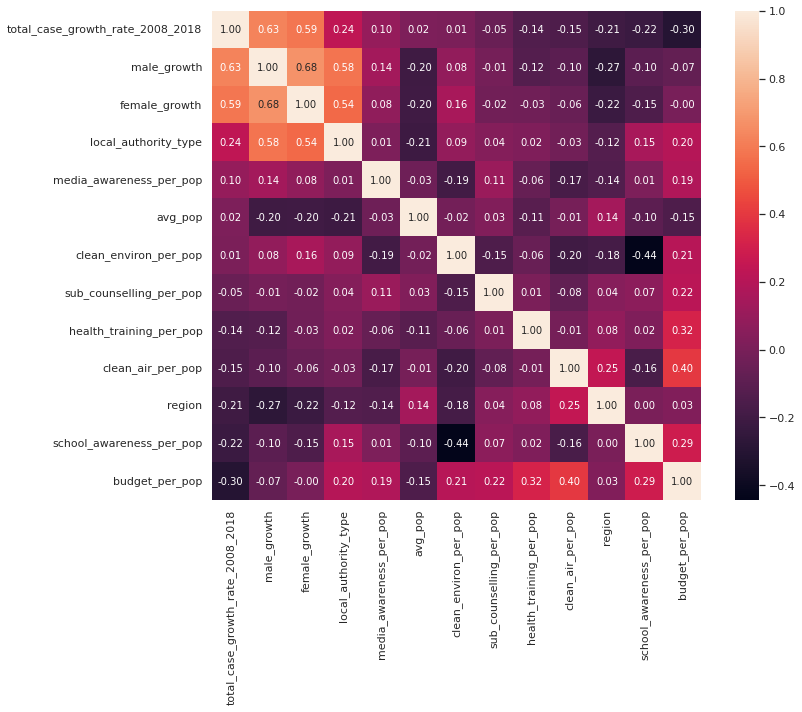

In [254]:
#correlation matrix
corr = summary_growth.corr()
f, ax = plt.subplots(figsize=(12, 9))
#sns.heatmap(corr, vmax=.8, square=True);

k= 18
cols = corr.nlargest(k, 'total_case_growth_rate_2008_2018')['total_case_growth_rate_2008_2018'].index
heat = np.corrcoef(summary_growth[cols].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(heat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

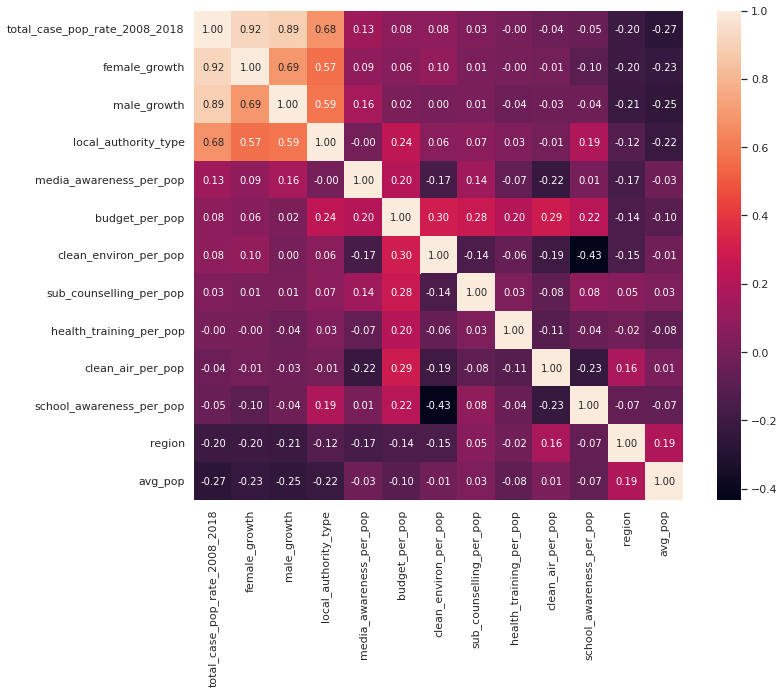

In [255]:
#correlation matrix
corr = summary_pop.corr()
f, ax = plt.subplots(figsize=(12, 9))
#sns.heatmap(corr, vmax=.8, square=True);

k= 18
cols = corr.nlargest(k, 'total_case_pop_rate_2008_2018')['total_case_pop_rate_2008_2018'].index
heat = np.corrcoef(summary_pop[cols].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(heat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

####VIF

In [256]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
def variance_inflation_factors(exog_df):
    '''
    Parameters
    ----------
    exog_df : dataframe, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression.

    Returns
    -------
    vif : Series
        variance inflation factors
    '''
    exog_df = add_constant(exog_df)
    vifs = pd.Series(
        [1 / (1. - OLS(exog_df[col].values, 
                       exog_df.loc[:, exog_df.columns != col].values).fit().rsquared) 
         for col in exog_df],
        index=exog_df.columns,
        name='VIF'
    )
    return vifs

In [257]:
summary_pop = summary_pop.drop(columns = 'local_authority_area')
summary_growth = summary_growth.drop(columns = 'local_authority_area')

In [258]:
variance_inflation_factors(summary_growth.drop(columns='total_case_growth_rate_2008_2018',axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning:

divide by zero encountered in double_scalars



const                       106.560743
region                        1.200701
local_authority_type          1.921607
avg_pop                       1.114169
budget_per_pop                     inf
clean_air_per_pop                  inf
clean_environ_per_pop              inf
health_training_per_pop            inf
school_awareness_per_pop           inf
media_awareness_per_pop            inf
sub_counselling_per_pop            inf
male_growth                   2.349587
female_growth                 2.067882
Name: VIF, dtype: float64

##Budget Multiple Regression Analysis

In [259]:
summary_region = summary_growth.copy()

In [260]:
summary_growth = summary_growth.drop(columns = 'region')
summary_growth = summary_growth.drop(columns = 'local_authority_type')

In [261]:
#summary_growth = summary_growth.drop(columns = 'male_growth')
#summary_growth = summary_growth.drop(columns = 'female_growth')
summary_growth = summary_growth.drop(columns = 'avg_pop')

In [262]:
summary_growth

,total_case_growth_rate_2008_2018,budget_per_pop,clean_air_per_pop,clean_environ_per_pop,health_training_per_pop,school_awareness_per_pop,media_awareness_per_pop,sub_counselling_per_pop,male_growth,female_growth
0,0.286678,0.781641,0.118090,0.123713,0.101220,0.230556,0.101220,0.106843,0.323112,0.123063
1,0.434137,0.634340,0.144168,0.049017,0.066317,0.213369,0.086501,0.074967,0.439437,0.298156
3,0.083333,0.892900,0.183017,0.232930,0.105373,0.277298,0.055460,0.038822,-0.048612,0.051833
4,0.180064,0.790346,0.224945,0.316138,0.103353,0.048637,0.018239,0.079035,0.039025,0.141938
5,0.362235,0.834774,0.302029,0.113261,0.058728,0.268470,0.062923,0.029364,0.238278,0.247640
...,...,...,...,...,...,...,...,...,...,...
145,0.166797,0.649760,0.214514,0.146118,0.093267,0.127465,0.043525,0.024871,0.046284,0.063574
146,0.420168,0.662916,0.121636,0.249354,0.079063,0.115554,0.060818,0.036491,0.303135,0.415331
147,0.198336,0.797727,0.071438,0.107157,0.091282,0.218283,0.198439,0.111126,0.114346,0.057654
148,0.190949,0.782490,0.213104,0.186466,0.094898,0.126530,0.111546,0.049946,0.046316,0.058743


In [263]:
# These lines extract the y-values and the x-values from the data:
x_values = summary_growth[summary_growth.columns[1:17]]
y_values = summary_growth['total_case_growth_rate_2008_2018']

# These lines perform the regression procedure:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())

                                   OLS Regression Results                                   
Dep. Variable:     total_case_growth_rate_2008_2018   R-squared:                       0.525
Model:                                          OLS   Adj. R-squared:                  0.497
Method:                               Least Squares   F-statistic:                     18.41
Date:                              Mon, 15 Nov 2021   Prob (F-statistic):           2.41e-18
Time:                                      01:07:26   Log-Likelihood:                 181.13
No. Observations:                               142   AIC:                            -344.3
Df Residuals:                                   133   BIC:                            -317.7
Df Model:                                         8                                         
Covariance Type:                          nonrobust                                         
                               coef    std err          t      P>|t|  

In [264]:
# Now we store all the relevant values:
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue

# And print them:
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

gradient  = -0.24383688224850517
intercept = 0.3551052090816557
Rsquared  = 0.5254128098896746
MSE       = 0.004875766398171418
pvalue    = 2.4148277536268897e-18


####Residual value analysis

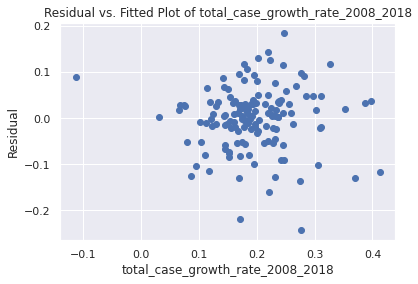

In [265]:
# plot 
plt.scatter(regression_model_b.fittedvalues, regression_model_b.resid)
# adding title and labels
plt.xlabel('total_case_growth_rate_2008_2018')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of total_case_growth_rate_2008_2018')
plt.show()

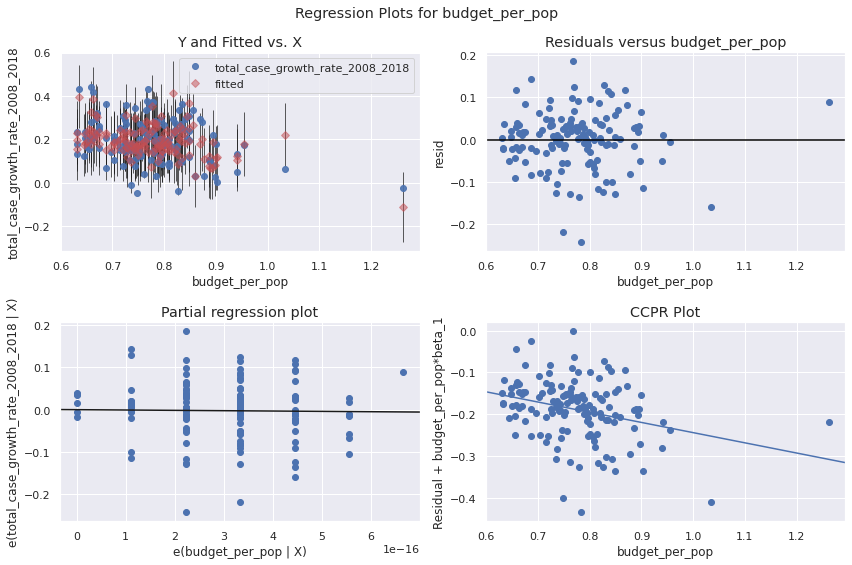

In [266]:
fig = plt.figure(figsize=(12,8))
fig = sms.graphics.plot_regress_exog(regression_model_b, 'budget_per_pop', fig=fig)

##Gender hypothesis test

####KS test

In [267]:
summary_gender = summary_growth[['male_growth','female_growth']]

In [268]:
summary_gender.describe()

,male_growth,female_growth
count,142.000000,142.000000
mean,0.123000,0.116930
std,0.125163,0.088617
min,-0.241803,-0.026830
25%,0.038694,0.052505
50%,0.104260,0.098303
75%,0.205469,0.162442
max,0.556537,0.456815


In [269]:
#Are men and women have a difference in Condition_X growth rate?
# H0: Men and Women have the same in Condition_X growth rate.
# H1: Men and Women are differnt in Condition_X growth rate.

In [270]:
# There is a built-in scipy.stats function (ks_2samp) that does steps 3 and 4 for us:

KS_stat, p_value = sps.ks_2samp(summary_gender['male_growth'],summary_gender['female_growth'])

# Compare with the KS stat we calculated earlier:

print("KS stat =", KS_stat)
print("p-value =", p_value)

KS stat = 0.13380281690140844
p-value = 0.15752338661451135


In [271]:
alpha =0.05

In [272]:
# Reach a conclusion:

if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different distributions.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same distribution.")

p-value >= significance threshold.
No significant evidence to reject H0.
Assume samples are drawn from populations with the same distribution.


##Regional logistic regression prediction

####Is the regional growth rate greater than the average

In [273]:
summary_region['total_case_growth_rate_2008_2018'].mean()

0.194967357388906

In [274]:
mean_growth = summary_region['total_case_growth_rate_2008_2018'].mean()

X = summary_region[summary_region.columns[1:3]]
y = summary_region[['total_case_growth_rate_2008_2018']] > mean_growth

In [275]:
X

,region,local_authority_type
0,0,1
1,0,1
3,0,0
4,0,0
5,0,1
...,...,...
145,0,0
146,0,0
147,0,0
148,0,0


In [276]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred=logreg.predict(X)

# print the coefficient in the model
print("------------------------------------------")
print("Print the model:")
coef_dict = {}
for coef, feat in zip(logreg.coef_.flatten().tolist(),X.columns):
    coef_dict[feat] = coef
    print(feat, ":", coef)
print("------------------------------------------")

------------------------------------------
Print the model:
region : -0.7326468292987594
local_authority_type : 0.6282864217952241
------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [277]:
acc = sklearn.metrics.accuracy_score(y,y_pred)
print("Accuracy of the model is: " + str(acc))

Accuracy of the model is: 0.5633802816901409


The confusion matrix is:


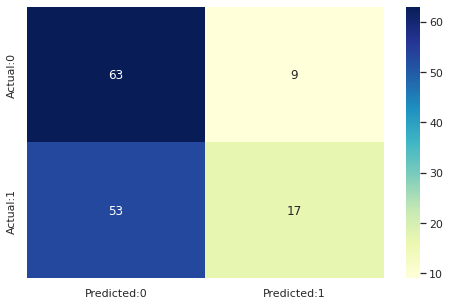

In [278]:
# Another evaluation: confusion matrix
print("The confusion matrix is:")
cm=confusion_matrix(y,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")